In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as p

In [50]:
df=pd.read_csv('used_phone.csv')

In [16]:
df.head()

,brand,model,ram_gb,storage_gb,condition,battery_health,age_years,original_price,resale_price
0,Samsung,Galaxy A55 5G,8,256,Like New,61,2,39999,17567
1,Oppo,OPPO A58 5G,6,128,Fair,69,1,13999,5216
2,OnePlus,OnePlus Nord N30 SE 5G,4,128,Like New,69,1,13999,7824
3,Redmi,POCO X5 Pro 5G,6,128,Fair,87,3,20999,7673
4,Realme,Realme Narzo 60x 5G,6,128,Fair,82,1,12999,5755


In [17]:
df.shape

(5000, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           5000 non-null   object
 1   model           5000 non-null   object
 2   ram_gb          5000 non-null   int64 
 3   storage_gb      5000 non-null   int64 
 4   condition       5000 non-null   object
 5   battery_health  5000 non-null   int64 
 6   age_years       5000 non-null   int64 
 7   original_price  5000 non-null   int64 
 8   resale_price    5000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


In [19]:
df.isna().sum()

brand             0
model             0
ram_gb            0
storage_gb        0
condition         0
battery_health    0
age_years         0
original_price    0
resale_price      0
dtype: int64

In [20]:
df.duplicated().sum()

99

In [21]:
df=df.drop_duplicates()

In [22]:
df.duplicated().sum()

0

In [23]:
df=df.reset_index(drop=True)

In [24]:
df.shape

(4901, 9)

In [25]:
df.head()

,brand,model,ram_gb,storage_gb,condition,battery_health,age_years,original_price,resale_price
0,Samsung,Galaxy A55 5G,8,256,Like New,61,2,39999,17567
1,Oppo,OPPO A58 5G,6,128,Fair,69,1,13999,5216
2,OnePlus,OnePlus Nord N30 SE 5G,4,128,Like New,69,1,13999,7824
3,Redmi,POCO X5 Pro 5G,6,128,Fair,87,3,20999,7673
4,Realme,Realme Narzo 60x 5G,6,128,Fair,82,1,12999,5755


In [56]:
le_brand=LabelEncoder()
le_model=LabelEncoder()
le_condition=LabelEncoder()

In [57]:
df['brand']=le_brand.fit_transform(df['brand'])
df['model']=le_model.fit_transform(df['model'])
df['condition']=le_condition.fit_transform(df['condition'])

In [33]:
df.head()

,brand,model,ram_gb,storage_gb,condition,battery_health,age_years,original_price,resale_price
0,7,8,8,256,2,61,2,39999,17567
1,4,54,6,128,0,69,1,13999,5216
2,3,79,4,128,2,69,1,13999,7824
3,6,84,6,128,0,87,3,20999,7673
4,5,103,6,128,0,82,1,12999,5755


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4901 entries, 0 to 4900
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   brand           4901 non-null   int64
 1   model           4901 non-null   int32
 2   ram_gb          4901 non-null   int64
 3   storage_gb      4901 non-null   int64
 4   condition       4901 non-null   int32
 5   battery_health  4901 non-null   int64
 6   age_years       4901 non-null   int64
 7   original_price  4901 non-null   int64
 8   resale_price    4901 non-null   int64
dtypes: int32(2), int64(7)
memory usage: 306.4 KB


In [35]:
x=df.drop(columns='resale_price')
y=df['resale_price']

In [36]:
x.columns

Index(['brand', 'model', 'ram_gb', 'storage_gb', 'condition', 'battery_health',
       'age_years', 'original_price'],
      dtype='object')

In [37]:
y.name

'resale_price'

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
model=RandomForestRegressor(n_estimators=100,random_state=42)

In [42]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [43]:
y_pred=model.predict(x_test)

In [45]:
print('Score of Model ',r2_score(y_pred,y_test))

Score of Model  0.9865101073189715


In [46]:
df.head()

,brand,model,ram_gb,storage_gb,condition,battery_health,age_years,original_price,resale_price
0,7,8,8,256,2,61,2,39999,17567
1,4,54,6,128,0,69,1,13999,5216
2,3,79,4,128,2,69,1,13999,7824
3,6,84,6,128,0,87,3,20999,7673
4,5,103,6,128,0,82,1,12999,5755


In [48]:
# model.predict([[7,8,8,256,2,61,2,39999]])

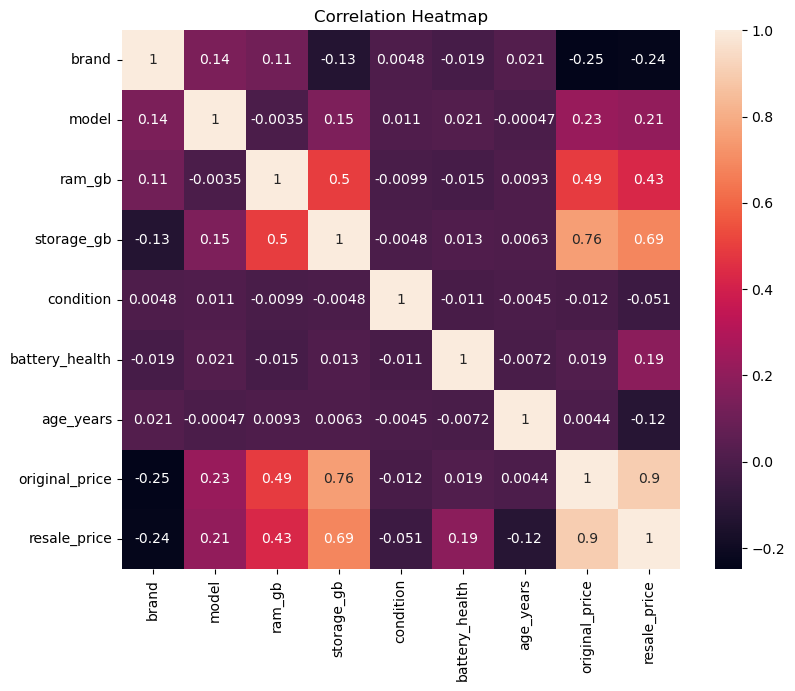

In [60]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [64]:
with open("used_phone.pkl","wb") as f:
    p.dump(model,f)